In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


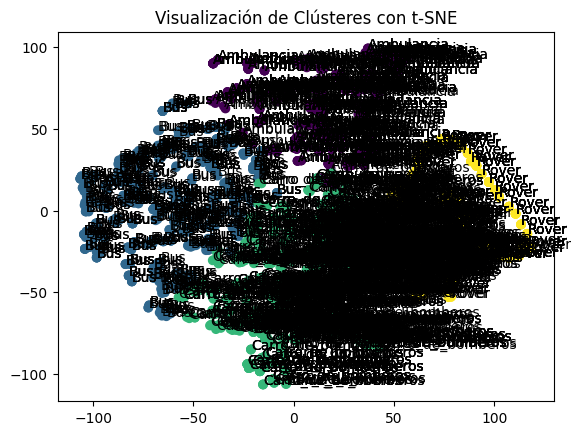

Coeficiente de Silueta: 0.23450790345668793


In [2]:
import os
from glob import glob
import numpy as np
import joblib
from keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Directorio de imágenes
data_total = '/content/drive/MyDrive/all_images'

# Parámetros
epocas = 100
longitud, altura = 150, 150
clases = 4

# Obtener lista de rutas de todas las imágenes
lista_imagenes = glob(os.path.join(data_total, '*.png'))

# Cargar todas las imágenes y convertirlas a matrices numpy
X = [img_to_array(load_img(img_path, target_size=(altura, longitud))) for img_path in lista_imagenes]
X = np.array(X)

# Asegurarse de que las imágenes tengan la misma forma
X = X.reshape(-1, altura * longitud * 3)

# Normalización de datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar K-Means directamente a las características normalizadas
kmeans = KMeans(n_clusters=clases, random_state=42, n_init=epocas)
labels = kmeans.fit_predict(X_normalized)

# Guardar el modelo K-Means
joblib.dump(kmeans, '/content/modelo/kmeans_model_cnn_features.joblib')

# Mapeo de nombres de clúster
mapeo_nombres = {
    0: "Ambulancia",
    1: "Bus",
    2: "Carro_de_bomberos",
    3: "Rover"
}

# Asignar nombres a los clústeres
nombres_clusters = [mapeo_nombres[label] for label in labels]

# Visualización de los resultados con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')

# Anotar los puntos con los nombres de los clústeres
for i, nombre in enumerate(nombres_clusters):
    plt.annotate(nombre, (X_tsne[i, 0], X_tsne[i, 1]))

plt.title('Visualización de Clústeres con t-SNE')
plt.show()

# Coeficiente de silueta
silhouette_avg = silhouette_score(X_normalized, labels)
print(f'Coeficiente de Silueta: {silhouette_avg}')

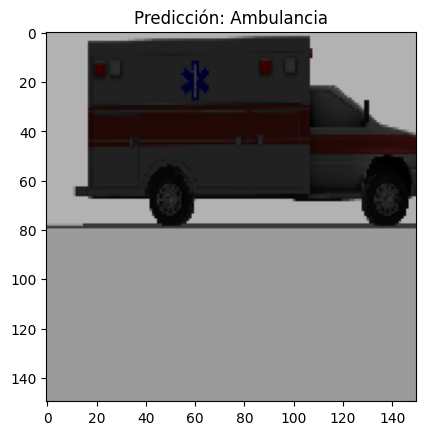

La nueva imagen pertenece al clúster: Ambulancia


In [5]:
import numpy as np
import joblib
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Ruta de la imagen que deseas predecir
ruta_imagen_nueva = '/content/drive/MyDrive/images_dataset/training/ambulancia/image_424.png'

# Cargar el modelo K-Means entrenado
modelo_kmeans = joblib.load('/content/modelo/kmeans_model_cnn_features.joblib')

# Cargar la nueva imagen y ajustar su tamaño
img_nueva = load_img(ruta_imagen_nueva, target_size=(150, 150))
img_array_nueva = img_to_array(img_nueva)
img_array_nueva_flattened = img_array_nueva.reshape(1, -1)

# Realizar la predicción con el modelo K-Means
label_predicho = modelo_kmeans.predict(img_array_nueva_flattened)

# Mapeo de nombres de clúster
mapeo_nombres = {
    0: "Ambulancia",
    1: "Bus",
    2: "Carro_de_bomberos",
    3: "Rover"
}

# Obtener el nombre del clúster predicho
nombre_predicho = mapeo_nombres[label_predicho[0]]

# Visualizar la imagen
plt.imshow(img_nueva)
plt.title(f'Predicción: {nombre_predicho}')
plt.show()

print(f'La nueva imagen pertenece al clúster: {nombre_predicho}')
